In [1]:
#Импортируем таблицы в список res[]
import pandas as pd
import os

files = os.listdir('D:/Course_Paper/DESC_FUT') #список файлов в папке folder

res = []
for file in files:
     #файл - только название файла. Поэтому нужно добавить еще путь к нему
    res.append(pd.read_csv('D:/Course_Paper/DESC_FUT/'+file, delimiter=";", encoding='latin-1'))

In [4]:
common_table=res[0]
for i in range(1,len(res)):
    common_table=pd.concat([common_table, res[i]])

In [5]:
columns=['REFERENCE_DATE','CONTRACT','SETTL_RUR']

In [7]:
futures=common_table[columns]

In [25]:
futures.iloc[:,0]=pd.to_datetime(futures.iloc[:,0],format='%Y-%m-%d')

In [11]:
futures.to_csv(r'D:/Course_Paper/futures_common_table_0905.csv')

In [6]:
futures=pd.read_csv(r'D:/Course_Paper/futures_common_table_0905.csv')

In [7]:
options=pd.read_csv(r'D:/Course_Paper/options_common_table_0304.csv')

In [8]:
del futures['Unnamed: 0']
del options['Unnamed: 0']
risk=pd.read_csv(r'D:/Course_Paper/options_risk_common_table_0304.csv')
del risk['Unnamed: 0']

In [12]:
import numpy as np
#Делаем левое объединение таблиц, чтобы добавить информацию об expiration date для call опционов
options_info=options.merge(risk, how = 'left', left_on=['REFERENCE_DATE','CONTRACT'], right_on=['REFERENCE_DATE','TICKER'])
#Удаляем строки, где есть NaN в столбцах
options_info = options_info.dropna(axis='index', how='any', subset=['TICKER'])
#Переиндексация
options_info.index = np.arange(len(options_info))

In [13]:
import datetime as DT
options_info.iloc[:,0]=pd.to_datetime(options_info.iloc[:,0],format='%Y-%m-%d')
options_info.iloc[:,8]=pd.to_datetime(options_info.iloc[:,8],format='%Y-%m-%d')
del options_info['IM_BUY']


In [14]:
options_info

,REFERENCE_DATE,CONTRACT,FUT_CONTR,STRIKE,PUT,THEORPRICE,VOLAT,BASEGOBUY,EXP_DATE,TICKER,IM_NOTCOVSELL,IM_COVSELL
0,2016-07-04,BR-8.16M260716CA 38,BR-8.16,38.0,C,12.12,46.61909,4482.75,2016-07-26,BR-8.16M260716CA 38,4506.46,899.76
1,2016-07-04,BR-8.16M260716CA 46,BR-8.16,46.0,C,4.53,37.49964,3139.60,2016-07-26,BR-8.16M260716CA 46,4337.41,2403.09
2,2016-07-04,BR-8.16M260716CA 47,BR-8.16,47.0,C,3.73,36.93442,2667.88,2016-07-26,BR-8.16M260716CA 47,4237.57,2568.98
3,2016-07-04,BR-8.16M260716CA 48,BR-8.16,48.0,C,3.00,36.47908,2182.97,2016-07-26,BR-8.16M260716CA 48,4100.94,2795.45
4,2016-07-04,BR-8.16M260716CA 49,BR-8.16,49.0,C,2.36,36.12862,1731.16,2016-07-26,BR-8.16M260716CA 49,3916.74,3136.59
...,...,...,...,...,...,...,...,...,...,...,...,...
990078,2020-02-11,VTBR-9.20M160920CA10750,VTBR-9.20,10750.0,C,9.00,45.58581,8.85,2020-09-16,VTBR-9.20M160920CA10750,81.41,929.46
990079,2020-02-11,VTBR-9.20M160920CA5250,VTBR-9.20,5250.0,C,271.00,30.27834,267.33,2020-09-16,VTBR-9.20M160920CA5250,713.21,839.83
990080,2020-02-11,VTBR-9.20M160920CA5750,VTBR-9.20,5750.0,C,153.00,30.46863,152.36,2020-09-16,VTBR-9.20M160920CA5750,564.16,894.27
990081,2020-02-11,VTBR-9.20M160920PA2250,VTBR-9.20,2250.0,P,12.00,49.84617,11.05,2020-09-16,VTBR-9.20M160920PA2250,81.41,984.52


In [15]:
def get_year(date):
    return date.year

options_info['YEAR'] = options_info['REFERENCE_DATE'].apply(get_year)

In [16]:
options_info

,REFERENCE_DATE,CONTRACT,FUT_CONTR,STRIKE,PUT,THEORPRICE,VOLAT,BASEGOBUY,EXP_DATE,TICKER,IM_NOTCOVSELL,IM_COVSELL,YEAR
0,2016-07-04,BR-8.16M260716CA 38,BR-8.16,38.0,C,12.12,46.61909,4482.75,2016-07-26,BR-8.16M260716CA 38,4506.46,899.76,2016
1,2016-07-04,BR-8.16M260716CA 46,BR-8.16,46.0,C,4.53,37.49964,3139.60,2016-07-26,BR-8.16M260716CA 46,4337.41,2403.09,2016
2,2016-07-04,BR-8.16M260716CA 47,BR-8.16,47.0,C,3.73,36.93442,2667.88,2016-07-26,BR-8.16M260716CA 47,4237.57,2568.98,2016
3,2016-07-04,BR-8.16M260716CA 48,BR-8.16,48.0,C,3.00,36.47908,2182.97,2016-07-26,BR-8.16M260716CA 48,4100.94,2795.45,2016
4,2016-07-04,BR-8.16M260716CA 49,BR-8.16,49.0,C,2.36,36.12862,1731.16,2016-07-26,BR-8.16M260716CA 49,3916.74,3136.59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990078,2020-02-11,VTBR-9.20M160920CA10750,VTBR-9.20,10750.0,C,9.00,45.58581,8.85,2020-09-16,VTBR-9.20M160920CA10750,81.41,929.46,2020
990079,2020-02-11,VTBR-9.20M160920CA5250,VTBR-9.20,5250.0,C,271.00,30.27834,267.33,2020-09-16,VTBR-9.20M160920CA5250,713.21,839.83,2020
990080,2020-02-11,VTBR-9.20M160920CA5750,VTBR-9.20,5750.0,C,153.00,30.46863,152.36,2020-09-16,VTBR-9.20M160920CA5750,564.16,894.27,2020
990081,2020-02-11,VTBR-9.20M160920PA2250,VTBR-9.20,2250.0,P,12.00,49.84617,11.05,2020-09-16,VTBR-9.20M160920PA2250,81.41,984.52,2020


In [17]:
options_info[options_info['YEAR']==2018]

,REFERENCE_DATE,CONTRACT,FUT_CONTR,STRIKE,PUT,THEORPRICE,VOLAT,BASEGOBUY,EXP_DATE,TICKER,IM_NOTCOVSELL,IM_COVSELL,YEAR
369020,2018-01-03,ALRS-3.18M140318CA7750,ALRS-3.18,7750.0,C,326.0,26.29133,323.19,2018-03-14,ALRS-3.18M140318CA7750,1139.57,1092.93,2018
369021,2018-01-03,ALRS-3.18M140318CA8000,ALRS-3.18,8000.0,C,231.0,26.61301,229.45,2018-03-14,ALRS-3.18M140318CA8000,1031.83,1170.78,2018
369022,2018-01-03,ALRS-3.18M140318CA9000,ALRS-3.18,9000.0,C,64.0,30.26715,63.78,2018-03-14,ALRS-3.18M140318CA9000,716.83,1301.50,2018
369023,2018-01-03,ALRS-3.18M140318PA7000,ALRS-3.18,7000.0,P,118.0,28.44084,117.21,2018-03-14,ALRS-3.18M140318PA7000,762.13,1276.59,2018
369024,2018-01-03,ALRS-3.18M140318PA7500,ALRS-3.18,7500.0,P,263.0,26.43626,259.15,2018-03-14,ALRS-3.18M140318PA7500,1027.27,1187.42,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
650640,2018-12-29,VTBR-3.19M200319PA3000,VTBR-3.19,3000.0,P,67.0,37.03107,66.99,2019-03-20,VTBR-3.19M200319PA3000,421.84,824.73,2018
650641,2018-12-29,VTBR-3.19M200319PA3500,VTBR-3.19,3500.0,P,243.0,33.51228,233.29,2019-03-20,VTBR-3.19M200319PA3500,667.38,691.81,2018
650642,2018-12-29,VTBR-6.19M190619PA2000,VTBR-6.19,2000.0,P,18.0,49.39092,17.99,2019-06-19,VTBR-6.19M190619PA2000,139.34,922.16,2018
650643,2018-12-29,VTBR-6.19M190619PA2250,VTBR-6.19,2250.0,P,35.0,46.98026,34.94,2019-06-19,VTBR-6.19M190619PA2250,204.18,923.20,2018


In [18]:
options_info[(options_info['TICKER'].str.contains("GAZR-6.18"))&(options_info['STRIKE']==15000)&(options_info['PUT']=='P')]

,REFERENCE_DATE,CONTRACT,FUT_CONTR,STRIKE,PUT,THEORPRICE,VOLAT,BASEGOBUY,EXP_DATE,TICKER,IM_NOTCOVSELL,IM_COVSELL,YEAR
407269,2018-02-26,GAZR-6.18M200618PA15000,GAZR-6.18,15000.0,P,845.0,25.61028,808.82,2018-06-20,GAZR-6.18M200618PA15000,1965.53,2097.08,2018
408352,2018-02-27,GAZR-6.18M200618PA15000,GAZR-6.18,15000.0,P,850.0,25.52664,804.42,2018-06-20,GAZR-6.18M200618PA15000,1893.75,2134.05,2018
409474,2018-02-28,GAZR-6.18M200618PA15000,GAZR-6.18,15000.0,P,1020.0,24.25127,987.73,2018-06-20,GAZR-6.18M200618PA15000,2109.29,1797.09,2018
410620,2018-03-01,GAZR-6.18M200618PA15000,GAZR-6.18,15000.0,P,1166.0,24.97721,1112.99,2018-06-20,GAZR-6.18M200618PA15000,2131.20,1682.74,2018
411788,2018-03-02,GAZR-6.18M200618PA15000,GAZR-6.18,15000.0,P,1163.0,20.87245,1089.65,2018-06-20,GAZR-6.18M200618PA15000,2087.45,1720.36,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492762,2018-06-14,GAZR-6.18M200618PA15000,GAZR-6.18,15000.0,P,1010.0,27.29552,1010.00,2018-06-20,GAZR-6.18M200618PA15000,2397.34,1569.89,2018
494039,2018-06-15,GAZR-6.18M200618PA15000,GAZR-6.18,15000.0,P,1210.0,42.01851,1224.37,2018-06-20,GAZR-6.18M200618PA15000,2360.75,1503.09,2018
495294,2018-06-18,GAZR-6.18M200618PA15000,GAZR-6.18,15000.0,P,1297.0,53.13441,1297.00,2018-06-20,GAZR-6.18M200618PA15000,2352.91,1472.32,2018
496584,2018-06-19,GAZR-6.18M200618PA15000,GAZR-6.18,15000.0,P,1402.0,77.10460,1409.40,2018-06-20,GAZR-6.18M200618PA15000,2315.66,1436.58,2018


In [19]:
mgnt_put=options_info[(options_info['TICKER'].str.contains("MGNT-6.18"))&(options_info['STRIKE']==4500)&(options_info['PUT']=='P')]

In [20]:
mgnt_put.index = np.arange(len(mgnt_put))

In [21]:
mgnt_put.head(100)

,REFERENCE_DATE,CONTRACT,FUT_CONTR,STRIKE,PUT,THEORPRICE,VOLAT,BASEGOBUY,EXP_DATE,TICKER,IM_NOTCOVSELL,IM_COVSELL,YEAR
0,2018-03-19,MGNT-6.18M200618PA4500,MGNT-6.18,4500.0,P,89.0,30.92241,88.42,2018-06-20,MGNT-6.18M200618PA4500,523.83,849.60,2018
1,2018-03-20,MGNT-6.18M200618PA4500,MGNT-6.18,4500.0,P,70.0,27.32169,69.84,2018-06-20,MGNT-6.18M200618PA4500,536.54,836.53,2018
2,2018-03-21,MGNT-6.18M200618PA4500,MGNT-6.18,4500.0,P,102.0,29.89480,101.51,2018-06-20,MGNT-6.18M200618PA4500,559.48,813.16,2018
3,2018-03-22,MGNT-6.18M200618PA4500,MGNT-6.18,4500.0,P,127.0,31.22033,124.90,2018-06-20,MGNT-6.18M200618PA4500,502.96,817.44,2018
4,2018-03-23,MGNT-6.18M200618PA4500,MGNT-6.18,4500.0,P,147.0,30.99372,145.75,2018-06-20,MGNT-6.18M200618PA4500,586.37,766.08,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2018-06-14,MGNT-6.18M200618PA4500,MGNT-6.18,4500.0,P,95.0,73.81189,95.00,2018-06-20,MGNT-6.18M200618PA4500,737.27,917.67,2018
63,2018-06-15,MGNT-6.18M200618PA4500,MGNT-6.18,4500.0,P,52.0,54.26180,52.00,2018-06-20,MGNT-6.18M200618PA4500,603.79,769.95,2018
64,2018-06-18,MGNT-6.18M200618PA4500,MGNT-6.18,4500.0,P,8.0,37.99687,8.00,2018-06-20,MGNT-6.18M200618PA4500,636.14,787.51,2018
65,2018-06-19,MGNT-6.18M200618PA4500,MGNT-6.18,4500.0,P,88.0,151.97182,88.00,2018-06-20,MGNT-6.18M200618PA4500,567.64,702.50,2018


In [22]:
mgnt_fut['SETTL_RUR'].describe()


NameError: name 'mgnt_fut' is not defined

In [285]:
193.285852/4913.059701

0.0393412382024706

In [23]:
mgnt_call=options_info[(options_info['TICKER'].str.contains("MGNT-6.18"))&(options_info['STRIKE']==4500)
                       &(options_info['PUT']=='C')&(options_info['REFERENCE_DATE']> DT.datetime(2018, 3, 18, 0, 0))]
mgnt_call.index = np.arange(len(mgnt_call))
mgnt_call

,REFERENCE_DATE,CONTRACT,FUT_CONTR,STRIKE,PUT,THEORPRICE,VOLAT,BASEGOBUY,EXP_DATE,TICKER,IM_NOTCOVSELL,IM_COVSELL,YEAR
0,2018-03-19,MGNT-6.18M200618CA4500,MGNT-6.18,4500.0,C,689.0,30.92241,629.66,2018-06-20,MGNT-6.18M200618CA4500,939.86,472.31,2018
1,2018-03-20,MGNT-6.18M200618CA4500,MGNT-6.18,4500.0,C,637.0,27.32169,591.88,2018-06-20,MGNT-6.18M200618CA4500,929.49,477.18,2018
2,2018-03-21,MGNT-6.18M200618CA4500,MGNT-6.18,4500.0,C,593.0,29.89480,555.12,2018-06-20,MGNT-6.18M200618CA4500,903.06,500.38,2018
3,2018-03-22,MGNT-6.18M200618CA4500,MGNT-6.18,4500.0,C,551.0,31.22033,537.20,2018-06-20,MGNT-6.18M200618CA4500,903.70,465.48,2018
4,2018-03-23,MGNT-6.18M200618CA4500,MGNT-6.18,4500.0,C,484.0,30.99372,466.93,2018-06-20,MGNT-6.18M200618CA4500,851.14,522.08,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2018-06-14,MGNT-6.18M200618CA4500,MGNT-6.18,4500.0,C,286.0,73.81189,285.68,2018-06-20,MGNT-6.18M200618CA4500,915.55,739.94,2018
63,2018-06-15,MGNT-6.18M200618CA4500,MGNT-6.18,4500.0,C,216.0,54.26180,217.73,2018-06-20,MGNT-6.18M200618CA4500,769.53,604.43,2018
64,2018-06-18,MGNT-6.18M200618CA4500,MGNT-6.18,4500.0,C,158.0,37.99687,158.00,2018-06-20,MGNT-6.18M200618CA4500,787.49,636.21,2018
65,2018-06-19,MGNT-6.18M200618CA4500,MGNT-6.18,4500.0,C,222.0,151.97182,222.00,2018-06-20,MGNT-6.18M200618CA4500,702.50,567.64,2018


In [26]:
mgnt_fut=futures[(futures['CONTRACT'].str.contains("MGNT-6.18"))&(futures['REFERENCE_DATE']> DT.datetime(2018, 3, 18, 0, 0))
       &(futures['REFERENCE_DATE']< DT.datetime(2018, 6, 21, 0, 0))]
mgnt_fut.index = np.arange(len(mgnt_fut))

In [27]:
mgnt_fut

,REFERENCE_DATE,CONTRACT,SETTL_RUR
0,2018-03-19,MGNT-6.18,5100.0
1,2018-03-20,MGNT-6.18,5067.0
2,2018-03-21,MGNT-6.18,4991.0
3,2018-03-22,MGNT-6.18,4924.0
4,2018-03-23,MGNT-6.18,4837.0
...,...,...,...
62,2018-06-14,MGNT-6.18,4691.0
63,2018-06-15,MGNT-6.18,4664.0
64,2018-06-18,MGNT-6.18,4650.0
65,2018-06-19,MGNT-6.18,4634.0


In [28]:
import pandas as pd
from scipy.stats import norm
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools
"""Создаем функцию, которая считает цену фьючерса при различных сценариях.
std-стандартное отклонение цены базового актива"""
def future_change(price,std):
    vector=[0,0,1/3*std,1/3*std,-1/3*std,-1/3*std,2/3*std,2/3*std,-2/3*std,-2/3*std,std,std,-std,-std,2*std,-2*std]
    changes=[]
    for i in range(0,len(vector)):
        changes.append(price*vector[i])
    #Два крайних сценария включаются с коэффициентом 0,35
    changes[-1]=changes[-1]*0.35
    changes[-2]=changes[-2]*0.35
    return changes

In [29]:
"""Создаем функцию, которая считает цену опциона"""
def option_price_share(price, strike, IV, time, put=False):
    ln=math.log(price/strike)
    denom=IV*math.sqrt(time)
    d1=(((IV**2)/2)*time+ln)/denom
    d2=d1-denom
    
    Nd1=norm.cdf(d1, loc=0, scale=1)
    Nd2=norm.cdf(d2, loc=0, scale=1)
    Nd_1=norm.cdf(-d1, loc=0, scale=1)
    Nd_2=norm.cdf(-d2, loc=0, scale=1)
    option=price*Nd1-strike*Nd2
    if put:
        option=strike*Nd_2-price*Nd_1
    return option

In [30]:
"""Создаем функцию, которая считает цену опциона при различных сценариях
basic_std - ст.откл. цены базового актива
delta_std - ст. откл. изменения IV"""
def option_change(price, strike, IV, time, basic_std, delta_std, put=False):
    price_vector=[0,0,1/3*basic_std,1/3*basic_std,-1/3*basic_std,-1/3*basic_std,
                 2/3*basic_std,2/3*basic_std,-2/3*basic_std,-2/3*basic_std,basic_std,
                 basic_std,-basic_std,-basic_std,2*basic_std,-2*basic_std]
    volatility_vector=[delta_std,-delta_std,delta_std,-delta_std,delta_std,-delta_std,delta_std,-delta_std,
                      delta_std,-delta_std,delta_std,-delta_std,delta_std,-delta_std,0,0]
    PL=[]
    basic_prices=[]
    contract_prices=[]
    if put:
        price0=option_price_share(price, strike, IV, time, put=True)
        for i in range(0,len(price_vector)):
            price_new=option_price_share(price*(1+price_vector[i]), strike, IV+volatility_vector[i], time, put=True)
            basic_prices.append(price*(1+price_vector[i]))
            contract_prices.append(price_new)
            PL.append(price_new-price0)

        PL[-1]=PL[-1]*0.35
        PL[-2]=PL[-2]*0.35

    else:
        price0=option_price_share(price, strike, IV, time, put=False)
        for i in range(0,len(price_vector)):
            price_new=option_price_share(price*(1+price_vector[i]), strike, IV+volatility_vector[i], time, put=False)
            basic_prices.append(price*(1+price_vector[i]))
            contract_prices.append(price_new)
            PL.append(price_new-price0)

        PL[-1]=PL[-1]*0.35
        PL[-2]=PL[-2]*0.35
    return PL, basic_prices, contract_prices

In [286]:

#Страйк на опционы
option_strike=4500
#Range для IV
delta_std=0.05
std=0.02
#Сюда будет на каждый день собираться сканируемый риск для фьюча
fut_scan=[]
#Сюда будет на каждый день собираться сканируемый риск для call опциона
#call_scan=[]
#Сюда будет на каждый день собираться сканируемый риск для put опциона
put_scan=[]
portfolio_scan=[]
basic_prices=[]
#Сюда будут собираться цены call опциона, которые наблюдаются в худших сценариях

#Сюда будут собираться цены put опциона, которые наблюдаются в худших сценариях
put_prices=[]
#Варьируем по количеству дней в стратегии закрытия. 
#Независимо от стратегии закрытия нам важно просто получить сканируемый риск и цены в худших сценариях
for i in range(0,len(mgnt_call)):
    fut_price=mgnt_fut.iloc[i,2]
    #IV_call=mgnt_call.iloc[i,6]
    IV_put=mgnt_put.iloc[i,6]
    #Уменьшение времени до исполнения
    option_time=float((mgnt_call.iloc[i,8]-mgnt_call.iloc[i,0]).days)/365
    #На каждый день считаем risk-array для фьючерса
    fut_scenarios=np.array(future_change(fut_price,3*std))
    #На каждый день считаем risk-array для фьючерса
    #call_scenarios=(-1)*np.array(option_change(fut_price, option_strike, IV_call, option_time, 
                                                  #3*std, delta_std, put=False)[0])
    #На каждый день считаем risk-array для фьючерса
    put_scenarios=np.array(option_change(fut_price, option_strike, IV_put, option_time, std, delta_std, put=True)[0])
    

    #На каждый день считаем цены put опциона в 16 сценариях
    put_prices_scenarios=np.array(option_change(fut_price, option_strike, IV_put, option_time, std, delta_std, put=True)[2])
    margin_scenario=fut_scenarios+put_scenarios#+put_scenarios
    #Выбираем наихудший сценарий
    min_scan_portfolio=min(margin_scenario)
    #Фиксируем сканируемый риск фьючерса, который реализуется в наихудшем сценарии для ВСЕГО портфеля
    fut_scan.append(fut_scenarios[np.where(margin_scenario == min_scan_portfolio)])
    put_prices.append(put_prices_scenarios[np.where(margin_scenario == min_scan_portfolio)])
    #Фиксируем сканируемый риск call опциона, который реализуется в наихудшем сценарии для ВСЕГО портфеля
    #call_scan.append(call_scenarios[np.where(margin_scenario == min_scan_portfolio)])
    #Фиксируем сканируемый риск put опциона, который реализуется в наихудшем сценарии для ВСЕГО портфеля
    put_scan.append(put_scenarios[np.where(margin_scenario == min_scan_portfolio)])
    portfolio_scan.append(fut_scan[i]+put_scan[i]) #+put_scan[i]
 

C:\Users\800G1\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [199]:
for i in range(1,len(portfolio_scan)):
    portfolio_scan[i]=portfolio_scan[i][0]

In [134]:
c=np.array(option_change(mgnt_fut.iloc[0,2], 4500, mgnt_call.iloc[0,6], 
                       float((mgnt_call.iloc[0,8]-mgnt_call.iloc[0,0]).days)/365, 
                                                  3*std, delta_std, put=False)[0])

In [137]:
p=np.array(option_change(mgnt_fut.iloc[0,2], 4500, mgnt_put.iloc[0,6], 
                       float((mgnt_put.iloc[0,8]-mgnt_put.iloc[0,0]).days)/365, 
                                                  3*std, delta_std, put=True)[0])

In [139]:
f=fut_scenarios=np.array(future_change(mgnt_fut.iloc[0,2],3*std))

In [208]:
fact_loss=[]
for i in range(1,len(mgnt_call)):
    delta_fut=mgnt_fut.iloc[i,2]-mgnt_fut.iloc[i-1,2]
    delta_call=mgnt_call.iloc[i,5]-mgnt_call.iloc[i-1,5]
    delta_put=mgnt_put.iloc[i,5]-mgnt_put.iloc[i-1,5]
    fact_loss.append(delta_fut+delta_put)

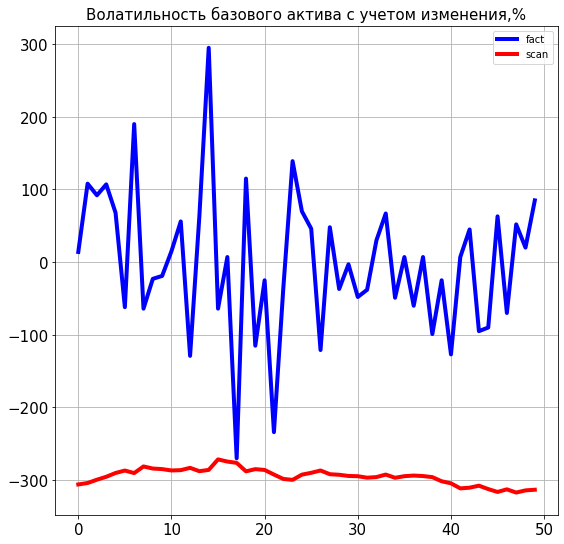

In [193]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.plot(fact_loss[0:50],color='blue',linewidth=4, label='fact')
plt.plot(portfolio_scan[0:50],color='red',linewidth=4, label='scan')
plt.title('Волатильность базового актива с учетом изменения,%',fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()
plt.legend()
plt.show()

In [202]:
for i in range(0,len(fut_scan)):
    fut_scan[i]=fut_scan[i][0]

In [31]:
q_p=[2000,2000,2000,2000,2000,2000,0]

In [32]:
#Генерируем различные сеты стратегий ликвидации
sale_fut=[]
sale_fut_0=[0,500,500,500,500,0]

#получаем список всех возможных перестановок реализации позиций
import itertools
per = itertools.permutations(sale_fut_0)
sale_fut_00=[]
for val in per:
    sale_fut_00.append(val)
    
sale_fut_000 = list(set(sale_fut_00))

for i in range(0,len(sale_fut_000)):
    sale_fut.append([0]+list(sale_fut_000[i]))

In [33]:
#Создаем вектор оставшихся позиций в портфеле
sale_fut_np=np.array(sale_fut)
sale_fut_cum=list(map(lambda x: x.cumsum(),sale_fut_np))
sale_fut_cum_np=np.array(sale_fut_cum)
fut_number=2000-sale_fut_cum_np

In [214]:
#Считаем ежедневные маржинальные требования, которые приходятся на put опцион

put_margin=[q_p[0]]*put_scan[0]

diff_put_scan = []
for x, y in zip(put_scan[0::], put_scan[1::]):
    diff_put_scan.append(y-x)

diff_put_scan=np.array(diff_put_scan)


diff_put_scan.shape=-1
all_put_scan=diff_put_scan[0:4]*q_p[1:len(q_p)-2]

put_day_margin=np.concatenate([put_margin, all_put_scan], axis=0)
put_day_margin=np.concatenate([put_day_margin, (q_p[-2]*(put_prices[5]-put_prices[4]))], axis=0)
put_day_margin

array([-3.637978807091713e-09, array([-3.88718036e-06]),
       array([3.83806764e-06]), array([4.72937245e-08]),
       array([-5.45696821e-09]), -5.238689482212067e-07], dtype=object)

In [215]:
diff_fut_scan = []
for x, y in zip(fut_scan[0::], fut_scan[1::]):
    diff_fut_scan.append(y-x)

diff_fut_scan=np.array(diff_fut_scan)
diff_fut_scan.shape=-1

diff_fut_scan

fut_margin=[]
for i in range(0,len(fut_number)):
    fut_margin.append(np.array(fut_number[i][0]*fut_scan[0]))
    
    
for i in range(0,len(fut_margin)):
    strategy_margin=np.array([diff_fut_scan[0:5]*fut_number[i][1:6]])
    strategy_margin.shape=-1
    fut_margin[i]=np.concatenate([fut_margin[i], strategy_margin], axis=0)
    
    
    
fut_margin

[array([-612000.0, array([3960.]), array([6840.]), array([4020.]),
        array([2610.]), array([1680.])], dtype=object),
 array([-612000.0, array([2970.]), array([6840.]), array([6030.]),
        array([5220.]), array([1680.])], dtype=object),
 array([-612000.0, array([2970.]), array([4560.]), array([4020.]),
        array([2610.]), array([0.])], dtype=object),
 array([-612000.0, array([2970.]), array([4560.]), array([4020.]),
        array([5220.]), array([1680.])], dtype=object),
 array([-612000.0, array([3960.]), array([6840.]), array([4020.]),
        array([5220.]), array([1680.])], dtype=object),
 array([-612000.0, array([3960.]), array([6840.]), array([4020.]),
        array([2610.]), array([0.])], dtype=object),
 array([-612000.0, array([3960.]), array([9120.]), array([6030.]),
        array([5220.]), array([1680.])], dtype=object),
 array([-612000.0, array([2970.]), array([6840.]), array([4020.]),
        array([2610.]), array([1680.])], dtype=object),
 array([-612000.0, arr

In [217]:
portfolio_margin=fut_margin+put_day_margin
portfolio_margin

array([[-612000.0000000036, array([3959.99999611]),
        array([6840.00000384]), array([4020.00000005]),
        array([2609.99999999]), array([1679.99999948])],
       [-612000.0000000036, array([2969.99999611]),
        array([6840.00000384]), array([6030.00000005]),
        array([5219.99999999]), array([1679.99999948])],
       [-612000.0000000036, array([2969.99999611]),
        array([4560.00000384]), array([4020.00000005]),
        array([2609.99999999]), array([-5.23868948e-07])],
       [-612000.0000000036, array([2969.99999611]),
        array([4560.00000384]), array([4020.00000005]),
        array([5219.99999999]), array([1679.99999948])],
       [-612000.0000000036, array([3959.99999611]),
        array([6840.00000384]), array([4020.00000005]),
        array([5219.99999999]), array([1679.99999948])],
       [-612000.0000000036, array([3959.99999611]),
        array([6840.00000384]), array([4020.00000005]),
        array([2609.99999999]), array([-5.23868948e-07])],
      

In [52]:
#Сводим стратегию закрытия к одной точке на горизонтальной оси
close_strategy_cum=list(map(lambda x: x.cumsum(),fut_number))
strategy_volume=list(map(lambda x: sum(x)/7,close_strategy_cum))

In [219]:
##Сводим маржинальные требования для стратегии в одну точку на вертикальной оси
strategy_margin=list(map(lambda x: sum(x),portfolio_margin))

In [444]:
#Соединяем в таблицу, чтобы удобно было сортировать
table=pd.DataFrame(columns=['scenario','collateral'])
table['scenario']=strategy_volume
table['collateral']=strategy_margin
table['fact']=strategy_fact
sort_table=table.sort_values(['scenario'],ascending=[1])
sort_table.index = np.arange(len(sort_table))

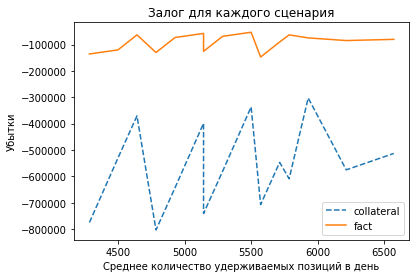

In [445]:
#Отрисовка
plt.plot(sort_table['scenario'], sort_table['collateral'], '--', label='collateral')
plt.plot(sort_table['scenario'], sort_table['fact'], label='fact')
plt.title('Залог для каждого сценария')
plt.ylabel('Убытки')
plt.xlabel('Среднее количество удерживаемых позиций в день') #средняя позиция к риску
plt.legend()
plt.show()

In [316]:
fut_loss=[]
put_loss=[]
call_loss=[]
for i in range(1,7):
    delta_fut=mgnt_fut.iloc[i,2]-mgnt_fut.iloc[i-1,2]
    delta_put=mgnt_put.iloc[i,5]-mgnt_put.iloc[i-1,5]
    delta_call=mgnt_call.iloc[i,5]-mgnt_call.iloc[i-1,5]
    fut_loss.append(delta_fut)
    put_loss.append(delta_put)
    call_loss.append(delta_call)

In [318]:
call_loss

[-52.0, -44.0, -42.0, -67.0, -44.0, 54.0]

In [320]:
#Считаем ежедневные маржинальные требования, которые приходятся на put опцион

call_fact=[q_p[0]*call_loss[0]]

diff_call_fact = []
for x, y in zip(call_loss[0::], call_loss[1::]):
    diff_call_fact.append(y-x)

diff_call_fact=np.array(diff_call_fact)


diff_call_fact.shape=-1
all_call_fact=diff_call_fact[0:4]*q_p[1:len(q_p)-2]

call_day_fact=np.concatenate([call_fact, all_call_fact], axis=0)
call_day_fact=np.concatenate([call_day_fact, np.array([(q_p[-2]*(mgnt_call.iloc[6,5]-mgnt_call.iloc[5,5]))])], axis=0)
call_day_fact

array([-104000.,   16000.,    4000.,  -50000.,   46000.,  108000.])

In [321]:
#Считаем ежедневные маржинальные требования, которые приходятся на put опцион

put_fact=[q_p[0]*put_loss[0]]

diff_put_fact = []
for x, y in zip(put_loss[0::], put_loss[1::]):
    diff_put_fact.append(y-x)

diff_put_fact=np.array(diff_put_fact)


diff_put_fact.shape=-1
all_put_fact=diff_put_fact[0:4]*q_p[1:len(q_p)-2]

put_day_fact=np.concatenate([put_fact, all_put_fact], axis=0)
put_day_fact=np.concatenate([put_day_fact, np.array([(q_p[-2]*(mgnt_put.iloc[6,5]-mgnt_put.iloc[5,5]))])], axis=0)
put_day_fact

array([-38000., 102000., -14000., -10000., -16000.,  -8000.])

In [322]:
diff_fut_fact = []
for x, y in zip(fut_loss[0::], fut_loss[1::]):
    diff_fut_fact.append(y-x)

diff_fut_fact=np.array(diff_fut_fact)
diff_fut_fact.shape=-1


fut_fact=[]
for i in range(0,len(fut_number)):
    fut_fact.append(np.array([fut_number[i][0]*fut_loss[0]]))
    
    
for i in range(0,len(fut_fact)):
    strategy_fact=np.array([diff_fut_fact[0:5]*fut_number[i][1:6]])
    strategy_fact.shape=-1
    fut_fact[i]=np.concatenate([fut_fact[i], strategy_fact], axis=0)
    
    
    
fut_fact

[array([-66000., -86000.,  13500., -20000.,  15500.,  57000.]),
 array([-66000., -64500.,  13500., -30000.,  31000.,  57000.]),
 array([-66000., -64500.,   9000., -20000.,  15500.,      0.]),
 array([-66000., -64500.,   9000., -20000.,  31000.,  57000.]),
 array([-66000., -86000.,  13500., -20000.,  31000.,  57000.]),
 array([-66000., -86000.,  13500., -20000.,  15500.,      0.]),
 array([-66000., -86000.,  18000., -30000.,  31000.,  57000.]),
 array([-66000., -64500.,  13500., -20000.,  15500.,  57000.]),
 array([-66000., -64500.,   9000., -20000.,  15500.,  57000.]),
 array([-66000., -64500.,   9000., -10000.,  15500.,  57000.]),
 array([-66000., -64500.,  13500., -20000.,  15500.,      0.]),
 array([-66000., -64500.,  13500., -20000.,  31000.,  57000.]),
 array([-66000., -64500.,   9000., -10000.,  15500.,      0.]),
 array([-66000., -86000.,  13500., -30000.,  31000.,  57000.]),
 array([-66000., -64500.,   9000., -10000.,      0.,      0.])]

In [327]:
portfolio_fact=fut_fact+put_day_fact-call_day_fact
portfolio_fact

array([[      0.,       0.,   -4500.,   20000.,  -46500.,  -59000.],
       [      0.,   21500.,   -4500.,   10000.,  -31000.,  -59000.],
       [      0.,   21500.,   -9000.,   20000.,  -46500., -116000.],
       [      0.,   21500.,   -9000.,   20000.,  -31000.,  -59000.],
       [      0.,       0.,   -4500.,   20000.,  -31000.,  -59000.],
       [      0.,       0.,   -4500.,   20000.,  -46500., -116000.],
       [      0.,       0.,       0.,   10000.,  -31000.,  -59000.],
       [      0.,   21500.,   -4500.,   20000.,  -46500.,  -59000.],
       [      0.,   21500.,   -9000.,   20000.,  -46500.,  -59000.],
       [      0.,   21500.,   -9000.,   30000.,  -46500.,  -59000.],
       [      0.,   21500.,   -4500.,   20000.,  -46500., -116000.],
       [      0.,   21500.,   -4500.,   20000.,  -31000.,  -59000.],
       [      0.,   21500.,   -9000.,   30000.,  -46500., -116000.],
       [      0.,       0.,   -4500.,   10000.,  -31000.,  -59000.],
       [      0.,   21500.,   -900

In [328]:
##Сводим маржинальные требования для стратегии в одну точку на вертикальной оси
strategy_fact=list(map(lambda x: sum(x),portfolio_fact))

In [41]:
#Наблюдаемая цена фьючерса, который также является базовым активом для опционов
fut_price=mgnt_fut.iloc[0,2]
#Страйк на опционы
option_strike=4500
IV=mgnt_put.iloc[0,6]/100
#Range для IV
delta_std=0.05
#Сюда будет на каждый день собираться сканируемый риск для фьюча
fut_scan=[]
#Сюда будет на каждый день собираться сканируемый риск для put опциона
put_scan=[]
call_scan=[]
#Сюда будут собираться цены put опциона, которые наблюдаются в худших сценариях
put_prices=[]
call_prices=[]
#Варьируем по количеству дней в стратегии закрытия. 
#Независимо от стратегии закрытия нам важно просто получить сканируемый риск и цены в худших сценариях
for i in range(0,len(q_p)):
    #Расширение диапазона волатильности с каждым днем
    std=2*0.02*math.sqrt(i) 
    #Уменьшение времени до исполнения
    option_time=float((mgnt_call.iloc[i,8]-mgnt_call.iloc[i,0]).days)/365
    #На каждый день считаем risk-array для фьючерса
    fut_scenarios=np.array(future_change(mgnt_fut.iloc[0,2],std))
    #На каждый день считаем risk-array для фьючерса
    put_scenarios=np.array(option_change(fut_price, option_strike, IV, option_time, std, delta_std, put=True)[0])
    call_scenarios=(-1)*np.array(option_change(fut_price, option_strike, IV, option_time, std, delta_std, put=False)[0])
    #На каждый день считаем цены put опциона в 16 сценариях
    put_prices_scenarios=np.array(option_change(fut_price, option_strike, IV, option_time, std, delta_std, put=True)[2])
    call_prices_scenarios=np.array(option_change(fut_price, option_strike, IV, option_time, std, delta_std, put=False)[2])
    #Суммируем все risk-arrays по трем контрактам
    margin_scenario=fut_scenarios+put_scenarios+call_scenarios
    #Выбираем наихудший сценарий
    min_scan_portfolio=min(margin_scenario)
    #Фиксируем сканируемый риск фьючерса, который реализуется в наихудшем сценарии для ВСЕГО портфеля
    fut_scan.append(fut_scenarios[np.where(margin_scenario == min_scan_portfolio)])
    #Фиксируем сканируемый риск put опциона, который реализуется в наихудшем сценарии для ВСЕГО портфеля
    put_scan.append(put_scenarios[np.where(margin_scenario == min_scan_portfolio)])
    call_scan.append(call_scenarios[np.where(margin_scenario == min_scan_portfolio)])
    #Фиксируем цены put опциона, которые реализуются в наихудшем сценарии для ВСЕГО портфеля
    put_prices.append(put_prices_scenarios[np.where(margin_scenario == min_scan_portfolio)])
    call_prices.append(call_prices_scenarios[np.where(margin_scenario == min_scan_portfolio)])


In [42]:
call_scan

[array([-36.45416346, -36.45416346, -36.45416346, -36.45416346,
        -36.45416346, -36.45416346, -36.45416346]),
 array([ -25.93540604, -202.15917961]),
 array([-136.93662225]),
 array([219.48549977, 305.2859711 ]),
 array([-145.02062337,   68.6153567 ,  255.01429783,  341.86674122,
        -259.9400776 ]),
 array([-422.78585884]),
 array([-323.85108797])]

In [43]:
call_margin=[]
for i in range(0,len(call_scan)):
    call_scan[i]=call_scan[i][0]
    
for i in range(0,len(call_scan)):
    call_prices[i]=call_prices[i][0]
    
call_margin=[q_p[0]*call_scan[0]]

diff_call_scan = []
for x, y in zip(call_scan[0::], call_scan[1::]):
    diff_call_scan.append(y-x)

diff_call_scan=np.array(diff_call_scan)


diff_call_scan.shape=-1
all_call_scan=[]
all_call_scan=diff_call_scan[0:4]*q_p[1:len(q_p)-2]
call_day_margin=[]
call_day_margin=np.concatenate([call_margin, all_call_scan], axis=0)
call_day_margin=np.concatenate([call_day_margin, np.array([(-1)*q_p[-2]*(call_prices[5]-call_prices[4])])], axis=0)
call_day_margin

array([ -72908.32691386,   21037.51483464, -222002.43241538,
        712844.24404341, -729012.24628256, -548501.46551715])

In [44]:
put_margin=[]

for i in range(0,len(call_scan)):
    put_prices[i]=put_prices[i][0]

for i in range(0,len(put_scan)):
    put_scan[i]=put_scan[i][0]
#Считаем ежедневные маржинальные требования, которые приходятся на put опцион

put_margin=[q_p[0]*put_scan[0]]

diff_put_scan = []
for x, y in zip(put_scan[0::], put_scan[1::]):
    diff_put_scan.append(y-x)

diff_put_scan=np.array(diff_put_scan)


diff_put_scan.shape=-1
all_put_scan=diff_put_scan[0:4]*q_p[1:len(q_p)-2]

put_day_margin=np.concatenate([put_margin, all_put_scan], axis=0)
put_day_margin=np.concatenate([put_day_margin, np.array([(-1)*q_p[-2]*(put_prices[5]-put_prices[4])])], axis=0)
put_day_margin

array([  72908.32691386, -157037.51483464,  -26663.6565501 ,
        378498.57441017, -249664.48320554,   91814.26930276])

In [45]:
for i in range(0,len(fut_scan)):
    fut_scan[i]=fut_scan[i][0]

fut_scan

[0.0,
 68.0,
 192.33304448274095,
 -353.338364744051,
 136.0,
 456.1578674099571,
 349.7871352694378]

In [46]:
fut_margin=[]
#for i in range(0,len(fut_scan)):
    #fut_scan[i]=fut_scan[i][0]


diff_fut_scan = []
for x, y in zip(fut_scan[0::], fut_scan[1::]):
    diff_fut_scan.append(y-x)

diff_fut_scan=np.array(diff_fut_scan)
diff_fut_scan.shape=-1

diff_fut_scan

fut_margin=[]
for i in range(0,len(fut_number)):
    fut_margin.append(np.array([fut_number[i][0]*fut_scan[0]]))
    
    
for i in range(0,len(fut_margin)):
    strategy_margin=np.array([diff_fut_scan[0:5]*fut_number[i][1:6]])
    strategy_margin.shape=-1
    fut_margin[i]=np.concatenate([fut_margin[i], strategy_margin], axis=0)
    
    
    
fut_margin

[array([      0.        ,  136000.        ,  186499.56672411,
        -545671.40922679,  244669.18237203,  160078.93370498]),
 array([      0.        ,  102000.        ,  186499.56672411,
        -818507.11384019,  489338.36474405,  160078.93370498]),
 array([      0.        ,  102000.        ,  124333.04448274,
        -545671.40922679,  244669.18237203,       0.        ]),
 array([      0.        ,  102000.        ,  124333.04448274,
        -545671.40922679,  489338.36474405,  160078.93370498]),
 array([      0.        ,  136000.        ,  186499.56672411,
        -545671.40922679,  489338.36474405,  160078.93370498]),
 array([      0.        ,  136000.        ,  186499.56672411,
        -545671.40922679,  244669.18237203,       0.        ]),
 array([      0.        ,  136000.        ,  248666.08896548,
        -818507.11384019,  489338.36474405,  160078.93370498]),
 array([      0.        ,  102000.        ,  186499.56672411,
        -545671.40922679,  244669.18237203,  160078.9337

In [47]:
strategy_margin

array([ 102000.        ,  124333.04448274, -272835.7046134 ,
             0.        ,       0.        ])

In [48]:
fut_margin[0]

array([      0.        ,  136000.        ,  186499.56672411,
       -545671.40922679,  244669.18237203,  160078.93370498])

In [57]:
#Считаем маржу для всего портфеля
portfolio_margin=fut_margin+put_day_margin-call_day_margin
portfolio_margin

array([[  145816.65382773,   -42075.02966928,   381838.34258939,
         -880017.07886003,   724016.94544904,   800394.66852489],
       [  145816.65382773,   -76075.02966928,   381838.34258939,
        -1152852.78347343,   968686.12782107,   800394.66852489],
       [  145816.65382773,   -76075.02966928,   319671.82034801,
         -880017.07886003,   724016.94544904,   640315.73481991],
       [  145816.65382773,   -76075.02966928,   319671.82034801,
         -880017.07886003,   968686.12782107,   800394.66852489],
       [  145816.65382773,   -42075.02966928,   381838.34258939,
         -880017.07886003,   968686.12782107,   800394.66852489],
       [  145816.65382773,   -42075.02966928,   381838.34258939,
         -880017.07886003,   724016.94544904,   640315.73481991],
       [  145816.65382773,   -42075.02966928,   444004.86483076,
        -1152852.78347343,   968686.12782107,   800394.66852489],
       [  145816.65382773,   -76075.02966928,   381838.34258939,
         -880017.0

In [58]:
##Сводим маржинальные требования для стратегии в одну точку на вертикальной оси
strategy_margin=list(map(lambda x: sum(x),portfolio_margin))

In [59]:
#Соединяем в таблицу, чтобы удобно было сортировать
table=pd.DataFrame(columns=['scenario','collateral'])
table['scenario']=strategy_volume
table['collateral']=strategy_margin
sort_table=table.sort_values(['scenario'],ascending=[1])
sort_table.index = np.arange(len(sort_table))

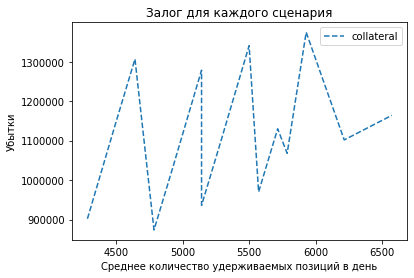

In [60]:
#Отрисовка
plt.plot(sort_table['scenario'], sort_table['collateral'], '--', label='collateral')
plt.title('Залог для каждого сценария')
plt.ylabel('Убытки')
plt.xlabel('Среднее количество удерживаемых позиций в день') #средняя позиция к риску
plt.legend()
plt.show()

In [55]:
((mgnt_call.iloc[0,8]-mgnt_call.iloc[0,0]).days)

93

In [56]:
mgnt_call.iloc[0,8]

Timestamp('2018-06-20 00:00:00')